In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

import pandas_profiling
import cufflinks as cf
cf.go_offline()

In [295]:
df = pd.read_csv("DataSets-main/final_data.csv")
city = pd.read_csv("DataSets-main/City_clean.csv")

In [27]:
print(city.shape)
city.head()

(20, 5)


,City,Population,Users,Diff_pop_users,Percent_of_users_from_pop
0,NEW YORK NY,8405837,302149,8103688,3.594514
1,CHICAGO IL,1955130,164468,1790662,8.412126
2,LOS ANGELES CA,1595037,144132,1450905,9.036279
3,MIAMI FL,1339155,17675,1321480,1.319862
4,SILICON VALLEY,1177609,27247,1150362,2.313756


In [4]:
print(df.shape)
df.head()

(349880, 31)


,Customer ID,Gender,Age,Income (USD/Month),age_group,Transaction ID,Payment_Mode,Date of Travel,Company,City_State,KM Travelled,Price Charged,Cost of Trip,Date,City,State,Day Name,Month,Year,Week Day,Is Weekend,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm,Conditions
0,8356,Male,62,13818,46-65,10000694,Cash,42371,Yellow Cab,LOS ANGELES CA,9.54,235.71,129.3624,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear
1,1020,Male,48,21007,46-65,10000940,Cash,42371,Yellow Cab,NEW YORK NY,14.40,420.70,205.6320,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
2,85,Male,19,19765,18-25,10000961,Card,42371,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
3,573,Male,34,2589,26-35,10000975,Card,42371,Yellow Cab,NEW YORK NY,37.12,1238.35,507.8016,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
4,1375,Male,45,12186,36-45,10000976,Cash,42371,Yellow Cab,NEW YORK NY,38.88,1211.78,517.8816,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy


In [5]:
df.describe()

,Customer ID,Age,Income (USD/Month),Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip,Month,Year,Week Day,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm
count,349880.000000,349880.000000,349880.000000,3.498800e+05,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000,349880.000000
mean,19215.724000,35.326861,15052.653281,1.021882e+07,42959.366106,22.569398,423.518378,286.240865,7.491514,2017.033054,3.752832,38.846222,-89.650969,14.750521,45.151056,3.172311,65.269247,21.569896,4.092931,1.218024
std,21259.275239,12.595043,7970.685882,1.271194e+05,308.366873,12.233144,274.673683,158.005371,3.443044,0.803384,1.860011,3.773077,18.773972,9.201586,30.071763,15.661072,14.731324,8.180029,22.926518,8.476209
min,1.000000,18.000000,2000.000000,1.000001e+07,42371.000000,1.900000,15.600000,19.000000,1.000000,2016.000000,0.000000,25.775000,-122.329000,-19.300000,0.000000,0.000000,5.140000,1.500000,0.000000,0.000000
25%,2635.000000,25.000000,8428.000000,1.010781e+07,42692.000000,12.000000,206.410000,151.200000,5.000000,2016.000000,3.000000,34.054000,-117.162000,8.100000,17.500000,0.000000,55.800000,16.000000,0.000000,0.000000
50%,7157.000000,33.000000,14687.000000,1.021839e+07,42981.000000,22.440000,386.385000,282.492000,8.000000,2017.000000,4.000000,40.714550,-80.198000,16.400000,44.500000,0.000000,66.640000,20.100000,0.000000,0.000000
75%,36966.250000,42.000000,21035.000000,1.032941e+07,43227.000000,32.960000,583.342500,413.812800,10.000000,2018.000000,5.000000,41.884000,-74.007140,22.100000,69.900000,1.000000,75.600000,26.000000,0.000000,0.000000
max,60000.000000,65.000000,35000.000000,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000,12.000000,2018.000000,6.000000,47.604000,-71.056740,40.400000,100.000000,292.000000,99.710000,76.000000,491.000000,304.000000


In [6]:
df.describe(include='O')

,Gender,age_group,Payment_Mode,Company,City_State,Date,City,State,Day Name,Conditions
count,349880,349880,349880,349880,349880,349880,349880,349880,349880,349880
unique,2,4,2,2,19,1095,19,13,7,12
top,Male,26-35,Card,Yellow Cab,NEW YORK NY,2018-01-05,NEW YORK,New York,Friday,Partially cloudy
freq,201139,110325,209890,267537,99885,1929,99885,99885,78760,121946


In [7]:
df.dtypes

Customer ID             int64
Gender                 object
Age                     int64
Income (USD/Month)      int64
age_group              object
Transaction ID          int64
Payment_Mode           object
Date of Travel          int64
Company                object
City_State             object
KM Travelled          float64
Price Charged         float64
Cost of Trip          float64
Date                   object
City                   object
State                  object
Day Name               object
Month                   int64
Year                    int64
Week Day                int64
Is Weekend               bool
Latitude              float64
Longitude             float64
Temperature C         float64
Cloud Cover %         float64
Precipitation mm      float64
Humidity %            float64
Wind Speed km         float64
Snow Depth mm         float64
Snow mm               float64
Conditions             object
dtype: object

In [320]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [226]:
yellow = df[df['Company'] == "Yellow Cab"]
pink = df[df['Company'] == "Pink Cab"]

In [227]:
print(yellow.shape)
yellow.head()

(267537, 32)


,Customer ID,Gender,Age,Income (USD/Month),age_group,Transaction ID,Payment_Mode,Date of Travel,Company,City_State,KM Travelled,Price Charged,Cost of Trip,Date,City,State,Day Name,Month,Year,Week Day,Is Weekend,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm,Conditions,Weekday/Weekend
0,8356,Male,62,13818,46-65,10000694,Cash,42371,Yellow Cab,LOS ANGELES CA,9.54,235.71,129.3624,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear,Weekend
1,1020,Male,48,21007,46-65,10000940,Cash,42371,Yellow Cab,NEW YORK NY,14.40,420.70,205.6320,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy,Weekend
2,85,Male,19,19765,18-25,10000961,Card,42371,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy,Weekend
3,573,Male,34,2589,26-35,10000975,Card,42371,Yellow Cab,NEW YORK NY,37.12,1238.35,507.8016,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy,Weekend
4,1375,Male,45,12186,36-45,10000976,Cash,42371,Yellow Cab,NEW YORK NY,38.88,1211.78,517.8816,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy,Weekend


In [228]:
print(pink.shape)
pink.head()

(82343, 32)


,Customer ID,Gender,Age,Income (USD/Month),age_group,Transaction ID,Payment_Mode,Date of Travel,Company,City_State,KM Travelled,Price Charged,Cost of Trip,Date,City,State,Day Name,Month,Year,Week Day,Is Weekend,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm,Conditions,Weekday/Weekend
10,39975,Male,40,7931,36-45,10000370,Card,42371,Pink Cab,TUCSON AZ,5.40,94.49,58.320,2016-01-02,TUCSON,Arizona,Saturday,1,2016,5,True,32.222,-110.970,12.1,0.0,0.0,45.7,36.5,0.0,0.0,Clear,Weekend
17,14340,Male,42,5484,36-45,10000365,Cash,42371,Pink Cab,SILICON VALLEY,9.00,167.18,90.000,2016-01-02,SILICON VALLEY,California,Saturday,1,2016,5,True,37.247,-121.773,8.0,65.6,0.0,64.6,8.3,0.0,0.0,Partially cloudy,Weekend
18,7539,Male,40,24169,36-45,10000127,Card,42371,Pink Cab,LOS ANGELES CA,38.00,850.87,425.600,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear,Weekend
19,6465,Male,46,3249,46-65,10000124,Card,42371,Pink Cab,LOS ANGELES CA,37.10,803.58,408.100,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear,Weekend
20,7199,Male,31,20802,26-35,10000119,Card,42371,Pink Cab,LOS ANGELES CA,22.31,463.50,243.179,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear,Weekend


In [90]:
correl = df_numeric.drop(columns=["Customer ID", "Transaction ID", "Date of Travel"]).corr()
correl.style.background_gradient(cmap='coolwarm')

,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Month,Year,Week Day,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm
Age,1.000000,0.003919,-0.000187,-0.002998,0.000043,-0.002830,-0.000867,-0.002070,-0.003172,-0.008792,0.000694,0.000645,-0.001969,0.000942,-0.003029,0.002105,0.003340
Income (USD/Month),0.003919,1.000000,-0.000610,0.003252,-0.000742,0.000598,-0.001254,-0.001119,0.003925,0.000898,-0.001178,-0.003329,-0.002288,0.000413,-0.000468,0.000719,-0.000457
KM Travelled,-0.000187,-0.000610,1.000000,0.834702,0.981863,-0.001453,-0.001100,0.001645,0.001139,-0.001592,-0.001378,0.002198,0.000560,0.000858,0.001271,-0.001328,0.001499
Price Charged,-0.002998,0.003252,0.834702,1.000000,0.858631,-0.059840,-0.036664,0.052661,0.080929,0.166201,-0.041433,-0.121148,0.043047,-0.025268,-0.002417,0.025955,0.031095
Cost of Trip,0.000043,-0.000742,0.981863,0.858631,1.000000,-0.008104,-0.001714,0.001336,0.030833,0.037948,-0.011838,0.006902,0.005072,0.000512,0.017113,0.003646,0.005533
Month,-0.002830,0.000598,-0.001453,-0.059840,-0.008104,1.000000,-0.032045,0.013996,-0.019225,0.016854,0.087659,-0.024831,-0.009002,0.075857,-0.099065,-0.179240,-0.115577
Year,-0.000867,-0.001254,-0.001100,-0.036664,-0.001714,-0.032045,1.000000,-0.078788,0.035687,-0.001892,-0.052811,-0.066299,0.058129,0.078701,-0.004132,0.118548,0.086876
Week Day,-0.002070,-0.001119,0.001645,0.052661,0.001336,0.013996,-0.078788,1.000000,-0.001935,0.002790,-0.009572,0.007553,-0.018401,-0.013971,0.002297,0.001434,-0.005068
Latitude,-0.003172,0.003925,0.001139,0.080929,0.030833,-0.019225,0.035687,-0.001935,1.000000,0.584159,-0.324653,0.142893,0.069525,0.055767,0.327180,0.114853,0.083230
Longitude,-0.008792,0.000898,-0.001592,0.166201,0.037948,0.016854,-0.001892,0.002790,0.584159,1.000000,-0.212891,0.069532,0.105251,0.014669,0.375283,0.125916,0.104650


<Figure size 1080x720 with 0 Axes>

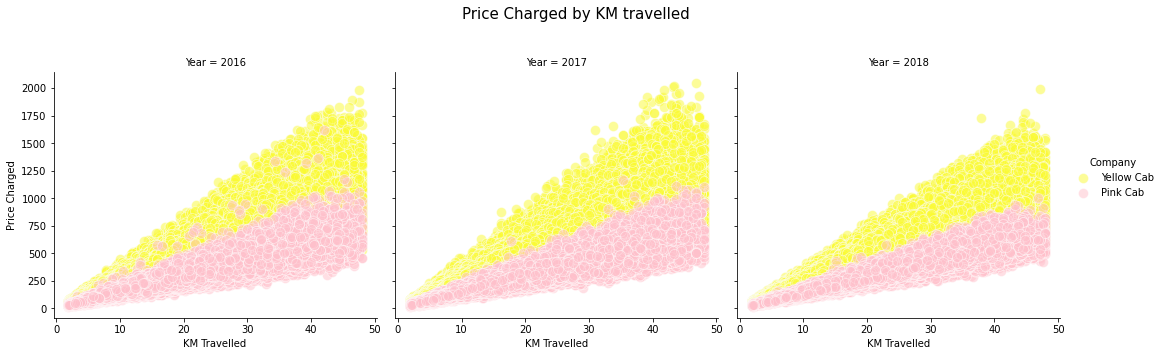

In [65]:
plt.figure(figsize=(15,10))
pal = {
    'Pink Cab': 'pink',
    'Yellow Cab': '#FAFA33',
}
g = sns.FacetGrid(df, col="Year", hue="Company", height=5, palette=pal)
g.map(sns.scatterplot, "KM Travelled", "Price Charged",  s=100, alpha=.5)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Price Charged by KM travelled", fontsize=15)
g.add_legend()
plt.show()

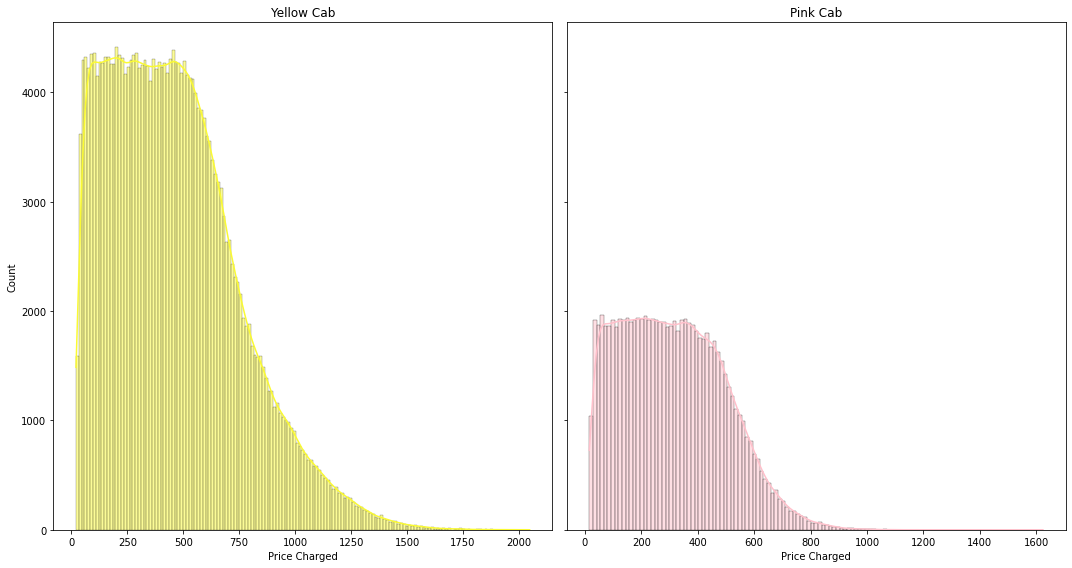

In [236]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0]).set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], color='pink').set_title("Pink Cab")
fig.tight_layout()

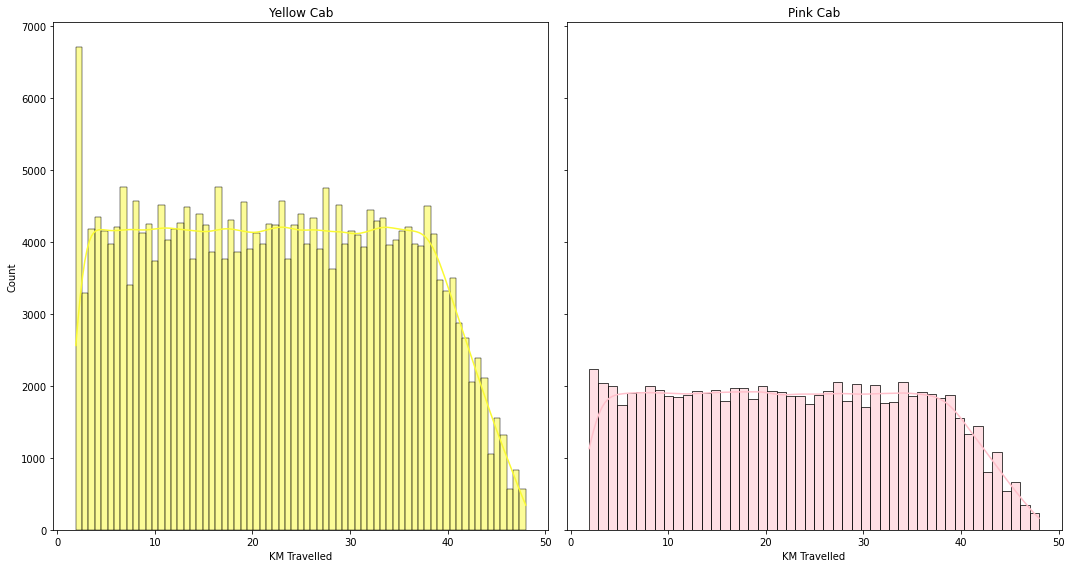

In [240]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="KM Travelled", kde=True, ax=axs[0]).set_title("Yellow Cab")
sns.histplot(pink, x="KM Travelled", kde=True, ax=axs[1], color='pink').set_title("Pink Cab")
fig.tight_layout()

In [241]:
yellow[["Price Charged", "KM Travelled"]].corr()

,Price Charged,KM Travelled
Price Charged,1.000000,0.857945
KM Travelled,0.857945,1.000000


In [242]:
pink[["Price Charged", "KM Travelled"]].corr()

,Price Charged,KM Travelled
Price Charged,1.00000,0.93041
KM Travelled,0.93041,1.00000


In [243]:
df[["Price Charged", "KM Travelled"]].corr()

,Price Charged,KM Travelled
Price Charged,1.000000,0.834702
KM Travelled,0.834702,1.000000


### Correlation coefficient 0.83. The relationship is very strong, since it fits in the 0.80 <= 1.00 category 

In [102]:
#!pip install scipy
# to get p-value (significance)
from scipy.stats import pearsonr, spearmanr

In [78]:
pearsonr(df["Price Charged"], df["KM Travelled"])

(0.8347016024667077, 0.0)

### p-value is very small and close to 0, we consider it significant

In [103]:
spearmanr(df["Price Charged"], df["KM Travelled"])

SpearmanrResult(correlation=0.8925968656062825, pvalue=0.0)

In [124]:
#!pip install pingouin
import pingouin as pg

In [125]:
pg.corr(df["Price Charged"], df["KM Travelled"])

,n,r,CI95%,p-val,BF10,power
pearson,349880,0.834702,"[0.83, 0.84]",0.0,inf,1.0


<Figure size 1080x720 with 0 Axes>

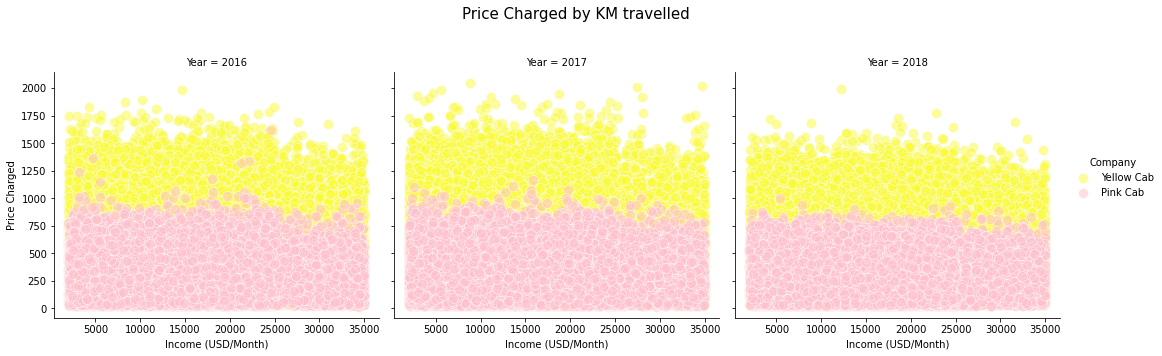

In [91]:
plt.figure(figsize=(15,10))
pal = {
    'Pink Cab': 'pink',
    'Yellow Cab': '#FAFA33',
}
g = sns.FacetGrid(df, col="Year", hue="Company", height=5, palette=pal)
g.map(sns.scatterplot, "Income (USD/Month)", "Price Charged",  s=100, alpha=.5)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Price Charged by KM travelled", fontsize=15)
g.add_legend()
plt.show()

In [92]:
pearsonr(df["Income (USD/Month)"], df["Price Charged"])

(0.003251893719757989, 0.05441544817950973)

### Price charged doesn't depend on monthly salary 

In [105]:
spearmanr(df["Income (USD/Month)"], df["Price Charged"])

SpearmanrResult(correlation=0.0029621479957146206, pvalue=0.07975188166577198)

<Figure size 1080x720 with 0 Axes>

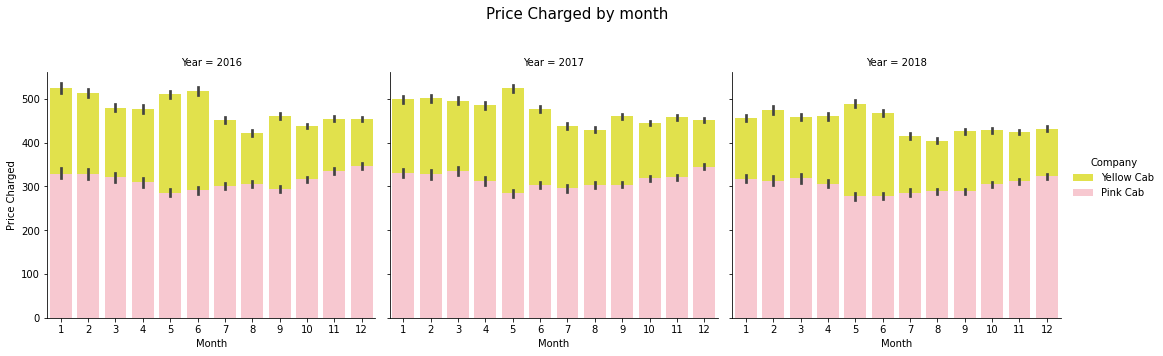

In [245]:
plt.figure(figsize=(15,10))
pal = {
    'Pink Cab': 'pink',
    'Yellow Cab': '#FAFA33',
}
g = sns.FacetGrid(df, col="Year", hue="Company", height=5, palette=pal);
g.map(sns.barplot, "Month", "Price Charged", order=df['Month'].unique());
g.fig.subplots_adjust(top=0.8);
g.fig.suptitle("Price Charged by month", fontsize=15);
g.add_legend();


In [ ]:
#pg.anova()

In [128]:
from scipy.stats import pointbiserialr
pointbiserialr(df["Month"], df["Price Charged"])

PointbiserialrResult(correlation=-0.05984015703074927, pvalue=6.450309971845339e-275)

<Figure size 1080x720 with 0 Axes>

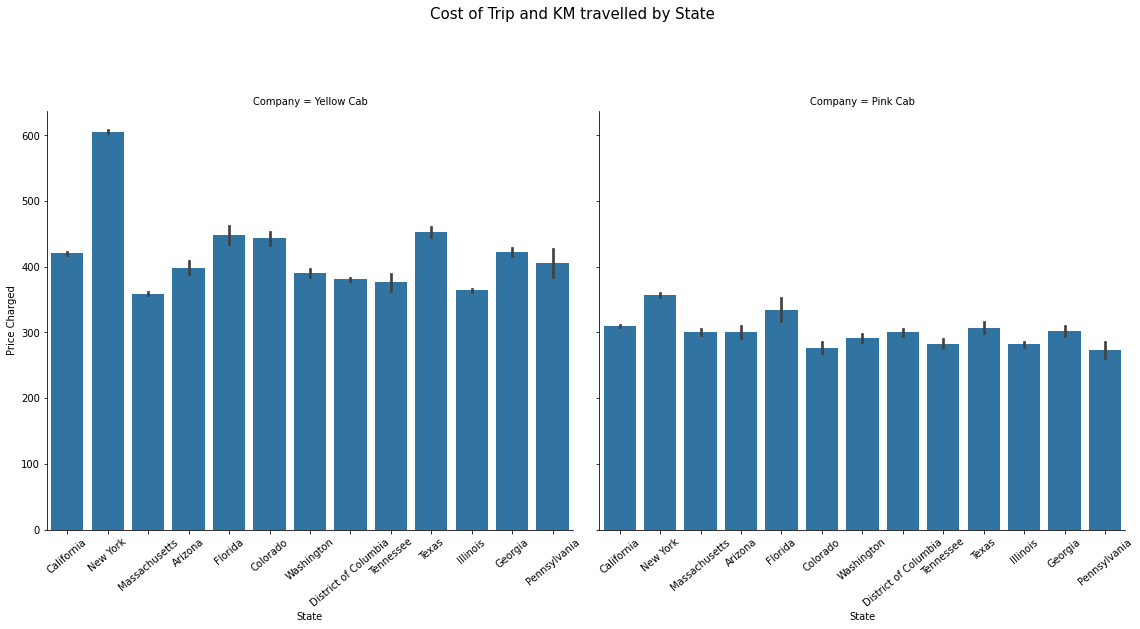

In [140]:
plt.figure(figsize=(15,10))
pal = {
    'Pink Cab': 'pink',
    'Yellow Cab': '#FAFA33',
}
# def twin_lineplot(x,y,color,**kwargs):
#     ax = plt.twinx()
#     sns.lineplot(x=x,y=y,color=color,**kwargs, ax=ax)

g = sns.FacetGrid(df, col="Company", height=8, palette=pal)
g.map(sns.barplot, "State", "Price Charged", order=df['State'].unique())
#g.map(twin_lineplot, 'State', 'KM Travelled', color='r')
g.fig.subplots_adjust(top=0.8)

g.fig.suptitle("Cost of Trip and KM travelled by State", fontsize=15)
g.set_xticklabels(rotation=40);


### Relationship between gender and price charged (ttest, one-way anova)

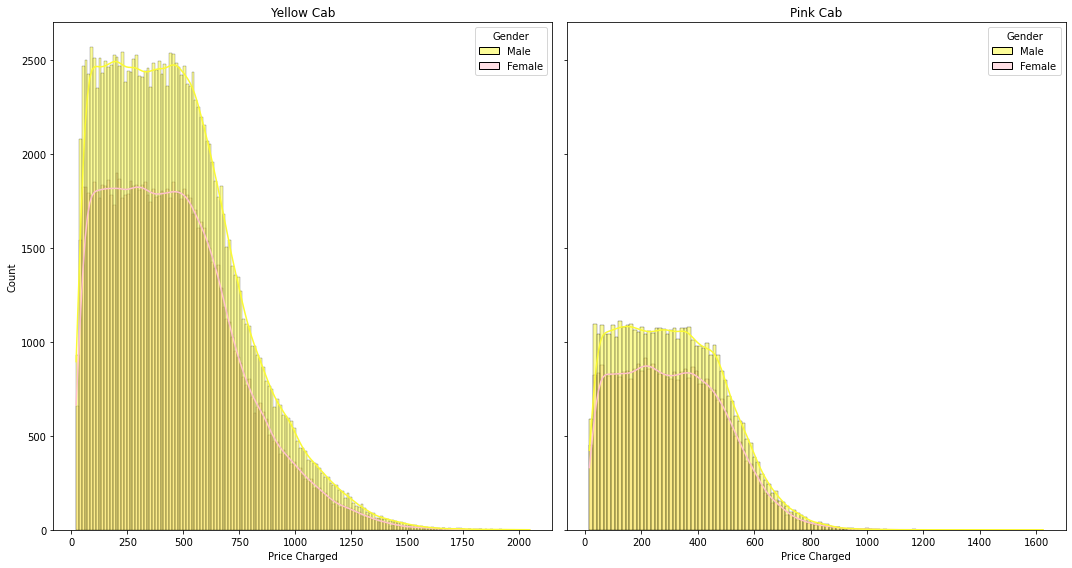

In [248]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0], hue="Gender").set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], hue="Gender").set_title("Pink Cab")
fig.tight_layout()

In [147]:
male = df[df["Gender"] == 'Male']
female = df[df["Gender"] == 'Female']

In [148]:
from scipy import stats

In [149]:
stats.ttest_ind(male["Price Charged"], female['Price Charged'])

Ttest_indResult(statistic=7.648071496888068, pvalue=2.0453206243509176e-14)

In [183]:
def anova(feature, label):
    groups = df[feature].unique()
    grouped_values = []
    for g in groups:
        grouped_values.append(df[df[feature] == g][label])
    return stats.f_oneway(*grouped_values)

In [184]:
anova("Gender", "Price Charged")

F_onewayResult(statistic=58.49299762151339, pvalue=2.04532062464041e-14)

### p-value is small, meaning that Price Charged is related of gender. More male tend to use cab service

### Relationship between State and Price Charged

<Figure size 1080x720 with 0 Axes>

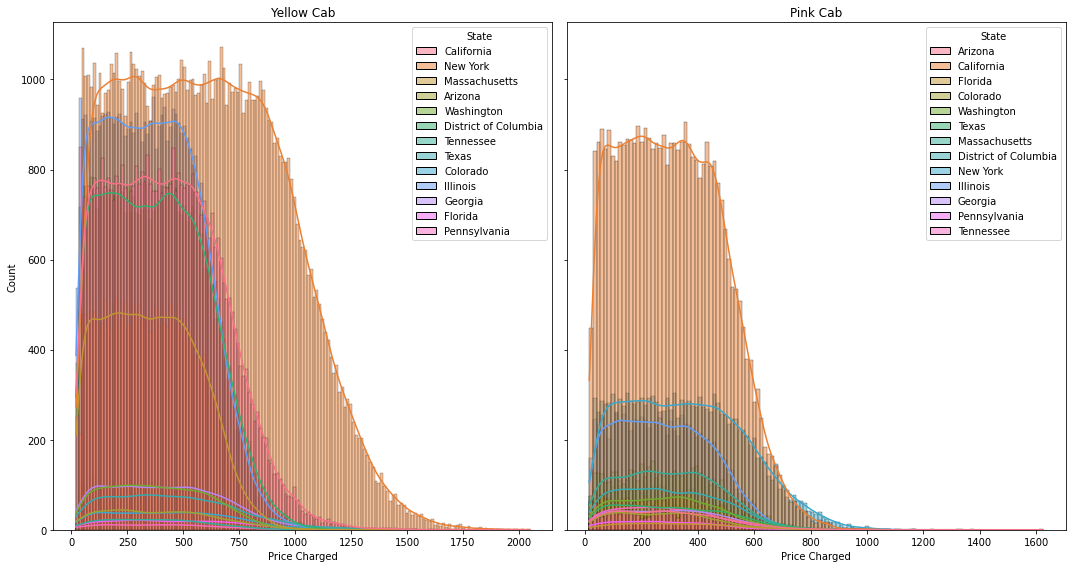

In [250]:
plt.figure(figsize=(15,10))
sns.color_palette("pastel")
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0], hue="State").set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], hue="State").set_title("Pink Cab")
fig.tight_layout()

In [185]:
anova("State", "Price Charged")

F_onewayResult(statistic=3830.1874052037456, pvalue=0.0)

### We can see that charged amount depend on state

### Price charged based on month of the year

<Figure size 1080x720 with 0 Axes>

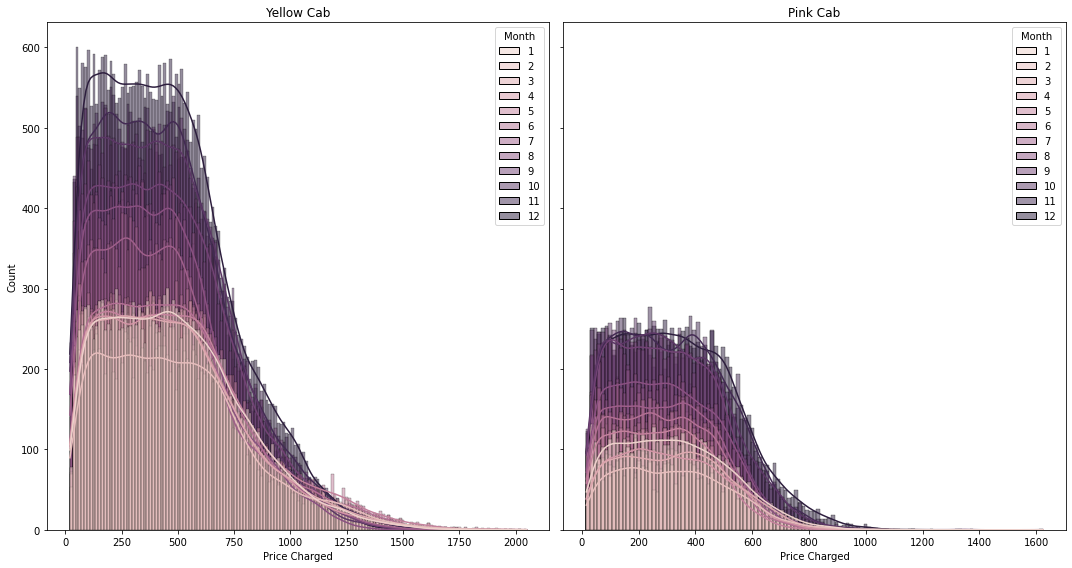

In [252]:
sns.color_palette("pastel")
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0], hue="Month").set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], hue="Month").set_title("Pink Cab")
fig.tight_layout()

In [186]:
anova("Month", "Price Charged")

F_onewayResult(statistic=221.32870554863757, pvalue=0.0)

### Price charged depend on time of the year, we can see from the plot  brings for revenue (October, November, December) brings more revenue

### relationship between Price charged and weather temperature

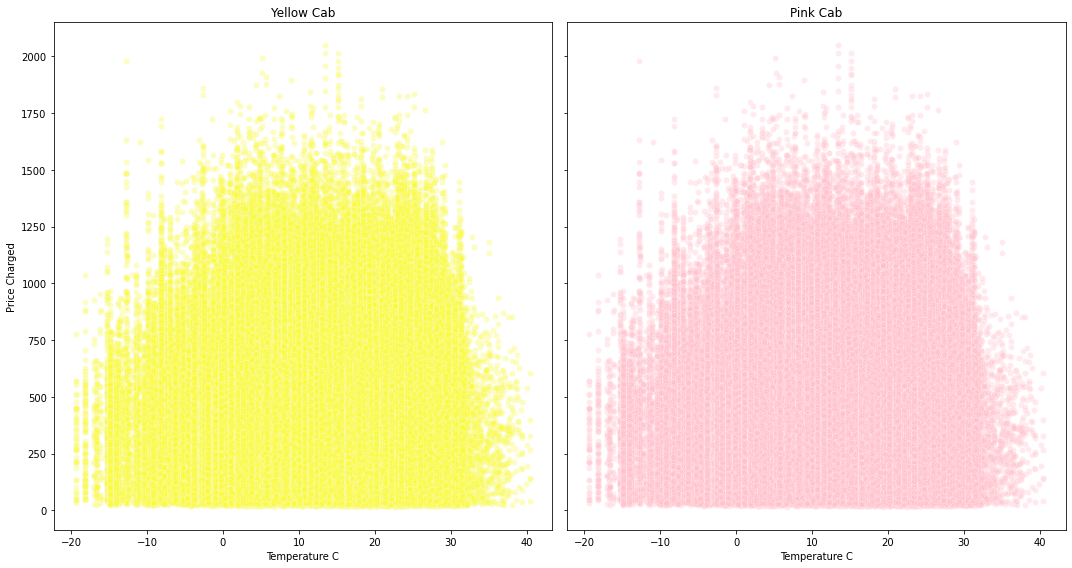

In [256]:
sns.color_palette("pastel")
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.scatterplot(data=df, x="Temperature C", y="Price Charged", alpha=0.3, ax=axs[0]).set_title("Yellow Cab")
sns.scatterplot(data=df, x="Temperature C", y="Price Charged", alpha=0.3, ax=axs[1], color='pink').set_title("Pink Cab")
fig.tight_layout()

In [170]:
spearmanr(df["Temperature C"], df["Price Charged"])

SpearmanrResult(correlation=-0.038833208107125226, pvalue=7.61639901332026e-117)

The price charged is also depends on temperature

In [ ]:
def is_weekend(d):
    if d == True:
        return "Weekend"
    if d == False:
        return "Weekday"

df["Weekday/Weekend"] = df["Is Weekend"].apply(is_weekend)

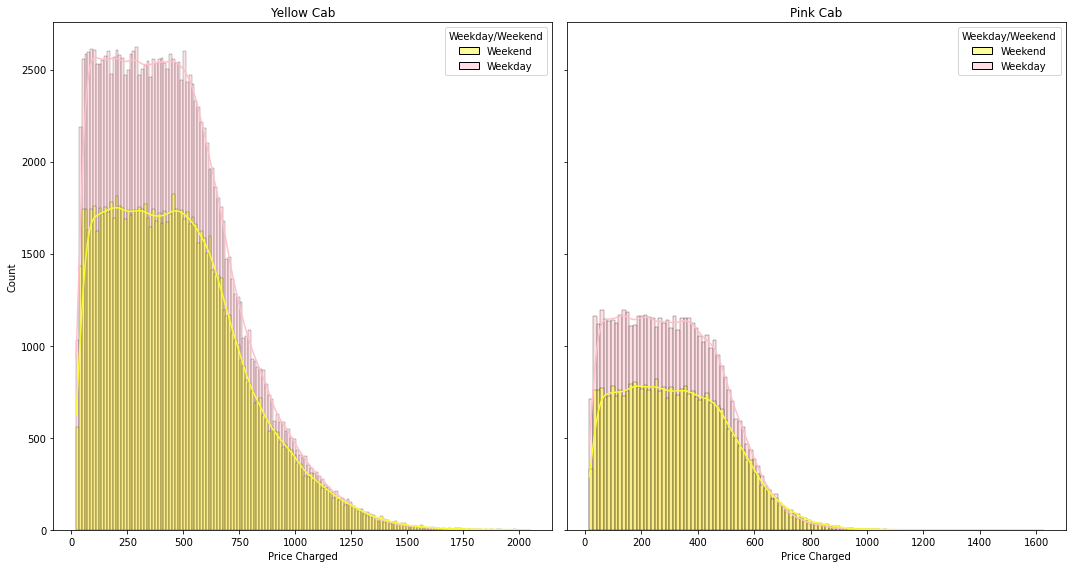

In [257]:
sns.color_palette("pastel")
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0], hue="Weekday/Weekend").set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], hue="Weekday/Weekend").set_title("Pink Cab")
fig.tight_layout()

In [187]:
anova("Weekday/Weekend", "Price Charged")

F_onewayResult(statistic=596.6472754166039, pvalue=1.1581387548820485e-131)

### on a weekday people tend to take cab, then on a weekend. Revenue mostly generated on a weekend for both yellow and pink cab

### Price Charged by Comapny

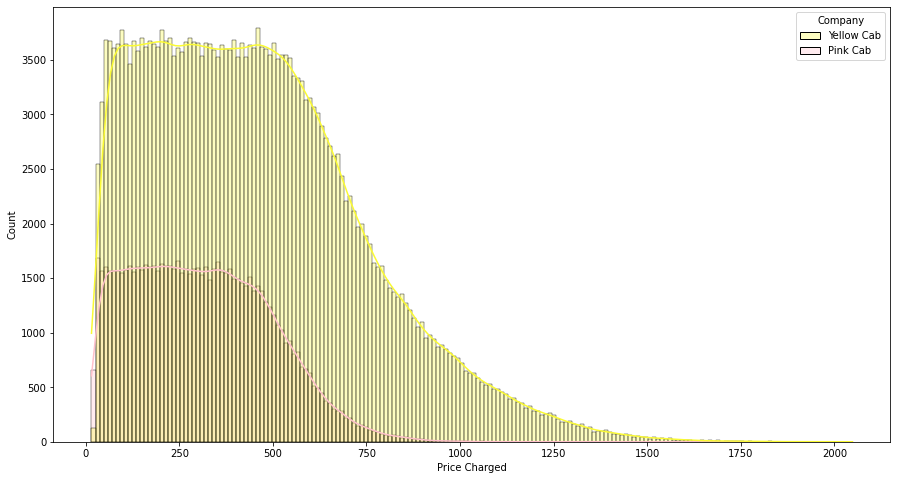

In [258]:
plt.figure(figsize=(15,8))
sns.color_palette("pastel")
sns.histplot(data=df, x="Price Charged", hue="Company", alpha=0.3, kde=True);

In [188]:
anova("Company", "Price Charged")

F_onewayResult(statistic=19010.347664792556, pvalue=0.0)

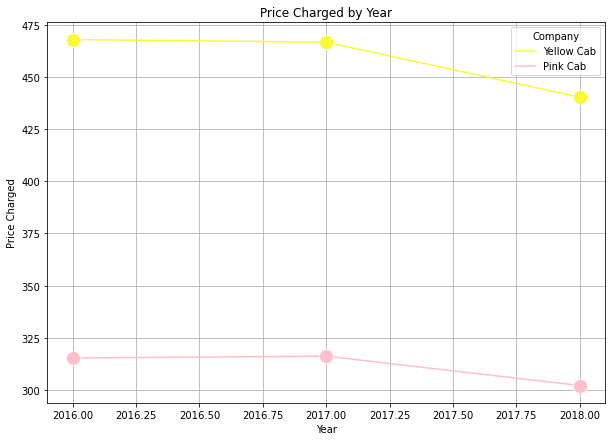

In [404]:
plt.figure(figsize=(10,7))
sns.set_palette(["#FAFA33", "pink"])
ax = sns.lineplot(data=df, x='Year', y='Price Charged', hue='Company', style="Company", marker='o', ci=None, dashes=False, markersize=14);
for container in ax.containers:
    ax.label(container)
plt.grid()
plt.title("Price Charged by Year")
plt.show()

In [407]:
ax.text()

''

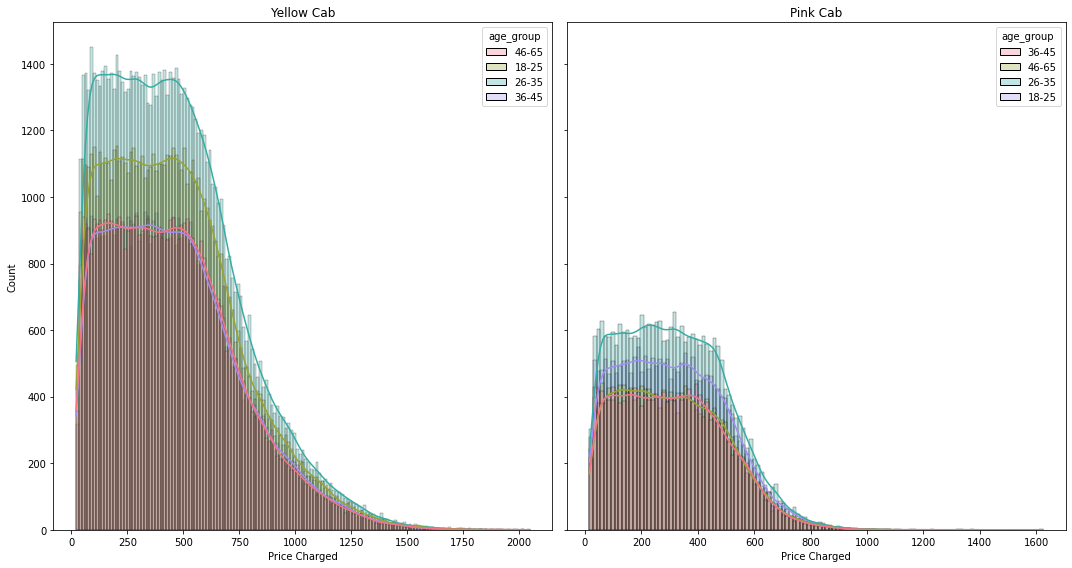

In [262]:

sns.color_palette("pastel")

fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.histplot(yellow, x="Price Charged", kde=True, ax=axs[0], hue="age_group", alpha=0.3).set_title("Yellow Cab")
sns.histplot(pink, x="Price Charged", kde=True, ax=axs[1], hue="age_group", alpha=0.3).set_title("Pink Cab")
fig.tight_layout()

In [261]:
anova("age_group", "Price Charged")

F_onewayResult(statistic=0.9076027589666088, pvalue=0.4363663027935343)

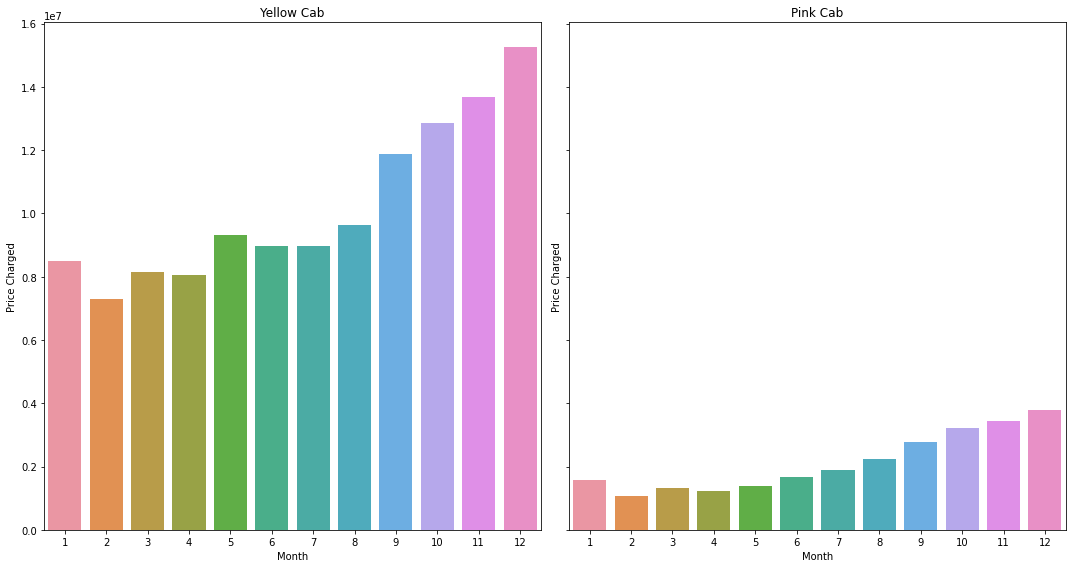

In [265]:
sns.color_palette("pastel")

fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.barplot(data=yellow, x='Month', y="Price Charged", ax=axs[0], ci=None, estimator=sum).set_title("Yellow Cab")
sns.barplot(data=pink, x='Month', y="Price Charged", ax=axs[1], ci=None, estimator=sum).set_title("Pink Cab")
fig.tight_layout()

### lookst like there is seasonality

### Test for seasonality and trend

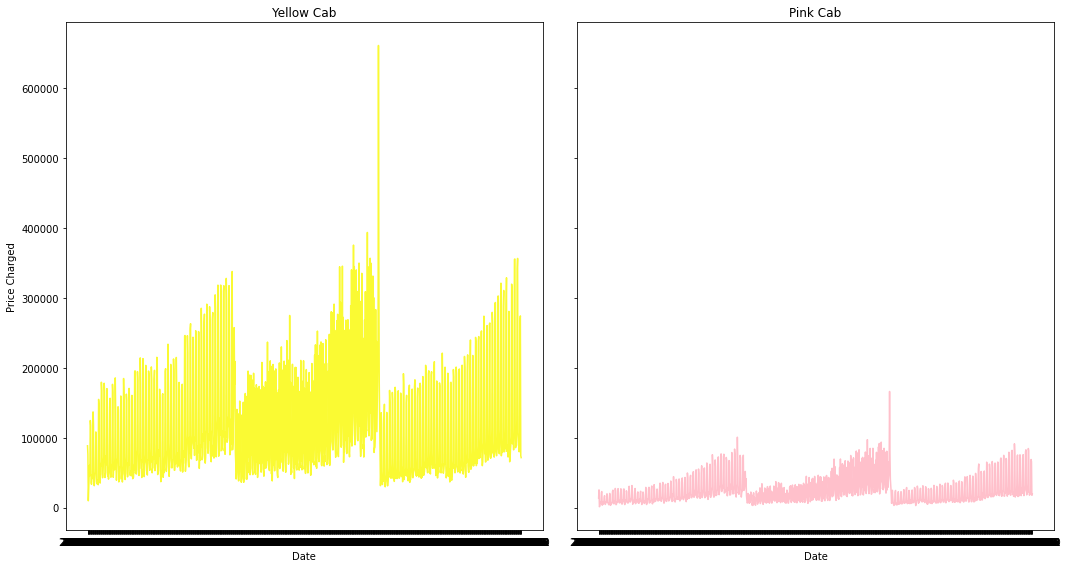

In [269]:
fig, axs = plt.subplots(ncols=2, figsize=(15,8), sharey=True)
sns.lineplot(data=yellow, x='Date', y="Price Charged", ax=axs[0], ci=None, estimator=sum).set_title("Yellow Cab")
sns.lineplot(data=pink, x='Date', y="Price Charged", ax=axs[1], ci=None, estimator=sum, color='pink').set_title("Pink Cab")
fig.tight_layout()

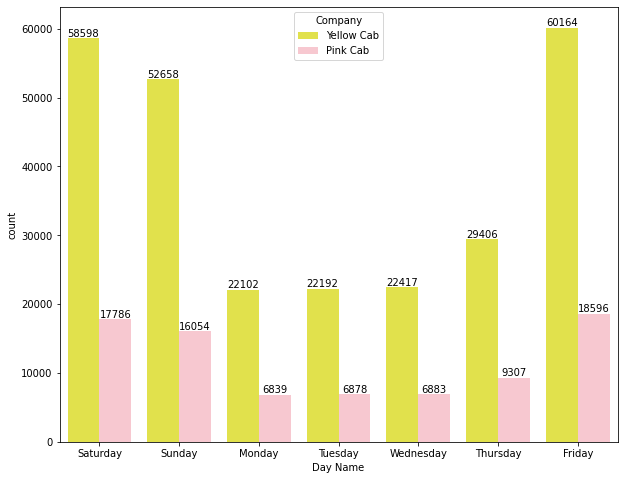

In [299]:
sns.color_palette("pastel")
plt.figure(figsize=(10,8))
ax = sns.countplot(x='Day Name',  hue='Company', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [307]:
len(yellow['Customer ID'].unique())

37326

In [326]:
df['Transaction ID'].count()

349880

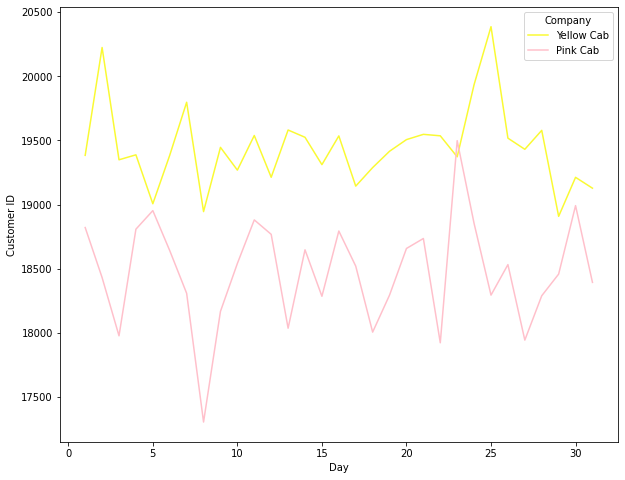

In [401]:
df["Day"] = df["Date"].dt.day

cust_day = df.groupby(['Day','Company'])['Customer ID'].nunique()
cust_day_df = pd.DataFrame(cust_day)
cust_day_df.reset_index(inplace=True)
sns.color_palette("pastel")
plt.figure(figsize=(10,8))
ax = sns.lineplot(x='Day', y='Customer ID', hue='Company', data=df, ci=None)
for container in ax.containers:
    ax.bar_label(container)

In [316]:
df.head()

,Customer ID,Gender,Age,Income (USD/Month),age_group,Transaction ID,Payment_Mode,Date of Travel,Company,City_State,KM Travelled,Price Charged,Cost of Trip,Date,City,State,Day Name,Month,Year,Week Day,Is Weekend,Latitude,Longitude,Temperature C,Cloud Cover %,Precipitation mm,Humidity %,Wind Speed km,Snow Depth mm,Snow mm,Conditions
0,8356,Male,62,13818,46-65,10000694,Cash,42371,Yellow Cab,LOS ANGELES CA,9.54,235.71,129.3624,2016-01-02,LOS ANGELES,California,Saturday,1,2016,5,True,34.054,-118.245,12.5,4.2,0.0,36.4,7.1,0.0,0.0,Clear
1,1020,Male,48,21007,46-65,10000940,Cash,42371,Yellow Cab,NEW YORK NY,14.40,420.70,205.6320,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
2,85,Male,19,19765,18-25,10000961,Card,42371,Yellow Cab,NEW YORK NY,19.04,634.46,253.6128,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
3,573,Male,34,2589,26-35,10000975,Card,42371,Yellow Cab,NEW YORK NY,37.12,1238.35,507.8016,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy
4,1375,Male,45,12186,36-45,10000976,Cash,42371,Yellow Cab,NEW YORK NY,38.88,1211.78,517.8816,2016-01-02,NEW YORK,New York,Saturday,1,2016,5,True,40.715,-74.007,2.2,43.0,0.0,48.0,23.0,0.0,0.0,Partially cloudy


In [372]:
d1 = df[df["Year"] == 2016]
d1['Customer ID'].nunique()

31152

In [378]:
d = df.groupby(['Company','Year'])['Customer ID'].nunique()

In [379]:
d

Company     Year
Pink Cab    2016    16661
            2017    17573
            2018    17318
Yellow Cab  2016    25937
            2017    25057
            2018    24820
Name: Customer ID, dtype: int64

In [351]:
unique_cust = pd.DataFrame(d)

In [357]:
unique_cust = unique_cust.reset_index()

In [363]:
unique_cust = unique_cust.sort_values(['Customer ID'], ascending=False)

Text(0.5, 1.0, 'Unique Customers per Year')

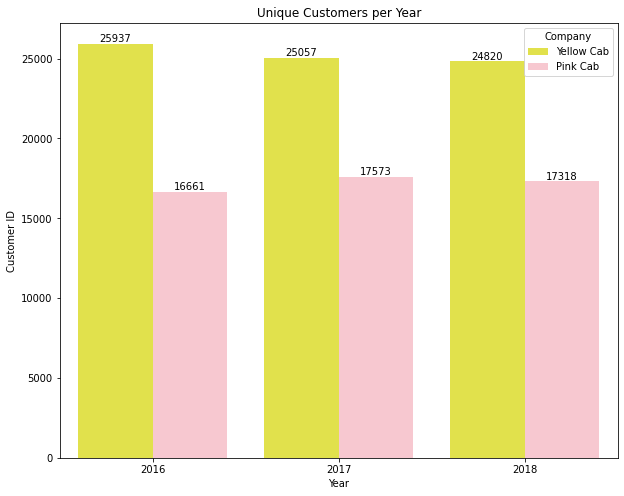

In [366]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Year", y="Customer ID", hue="Company", data=unique_cust)
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Unique Customers per Year")

In [335]:
len(df["Customer ID"].unique())

43650

In [380]:
c = df.groupby('Company')['Customer ID'].nunique()

In [382]:
c_df = pd.DataFrame(c)
c_df.reset_index(inplace=True)

Text(0.5, 1.0, 'Total number of unique users by company')

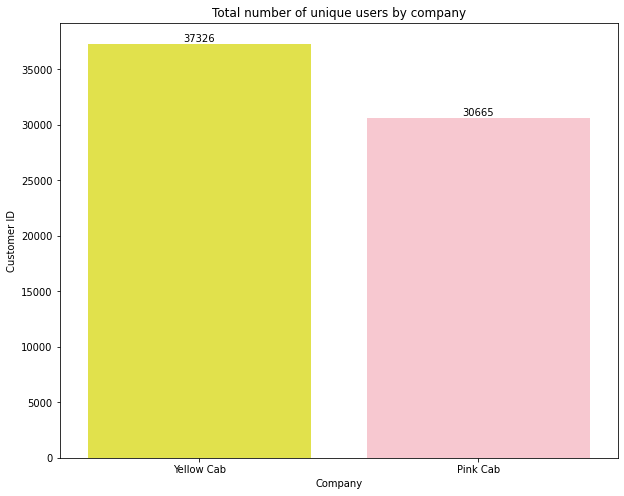

In [385]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x="Company", y="Customer ID", data=c_df.sort_values(['Customer ID'], ascending=False))
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Total number of unique users by company")

In [386]:
cust_city = df.groupby(['City','Company'])['Customer ID'].nunique()

In [387]:
cust_city

City            Company   
ATLANTA         Pink Cab      1322
                Yellow Cab    2595
AUSTIN          Pink Cab      1354
                Yellow Cab    1914
BOSTON          Pink Cab      2463
                Yellow Cab    2997
CHICAGO         Pink Cab      2859
                Yellow Cab    3000
DALLAS          Pink Cab       385
                Yellow Cab    1282
DENVER          Pink Cab      1145
                Yellow Cab    1681
LOS ANGELES     Pink Cab      2996
                Yellow Cab    2998
MIAMI           Pink Cab       548
                Yellow Cab    1046
NASHVILLE       Pink Cab      1356
                Yellow Cab     965
NEW YORK        Pink Cab      2972
                Yellow Cab    3000
ORANGE COUNTY   Pink Cab      1198
                Yellow Cab    1712
PHOENIX         Pink Cab       763
                Yellow Cab     994
PITTSBURGH      Pink Cab       604
                Yellow Cab     574
SACRAMENTO      Pink Cab      1078
                Yellow Cab  

In [388]:
cust_city_df = pd.DataFrame(cust_city)
cust_city_df.reset_index(inplace=True)

In [389]:
cust_city_df

,City,Company,Customer ID
0,ATLANTA,Pink Cab,1322
1,ATLANTA,Yellow Cab,2595
2,AUSTIN,Pink Cab,1354
3,AUSTIN,Yellow Cab,1914
4,BOSTON,Pink Cab,2463
5,BOSTON,Yellow Cab,2997
6,CHICAGO,Pink Cab,2859
7,CHICAGO,Yellow Cab,3000
8,DALLAS,Pink Cab,385
9,DALLAS,Yellow Cab,1282


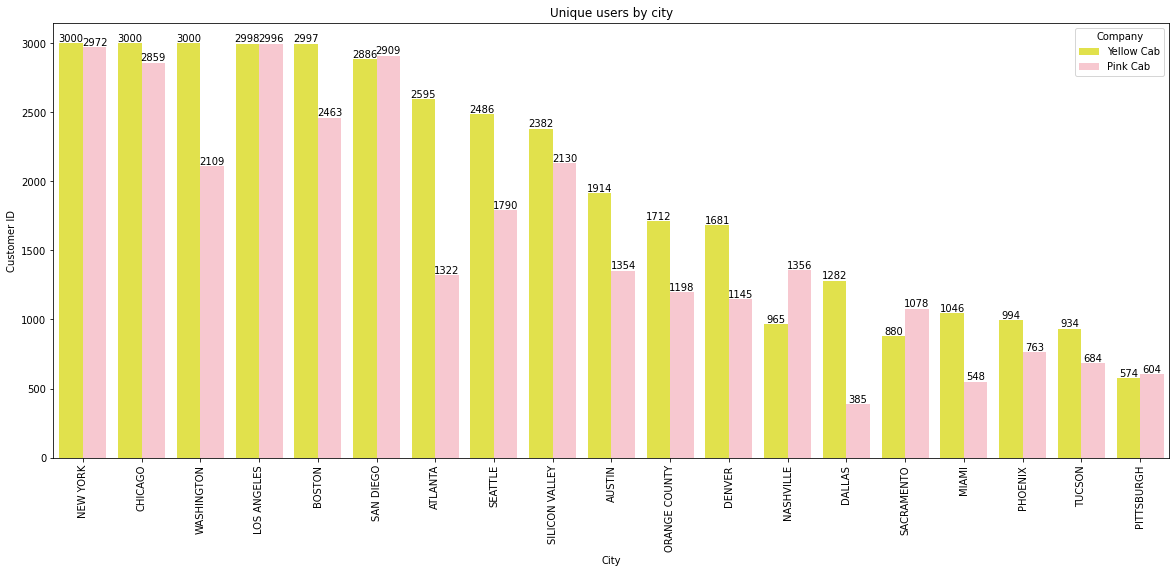

In [398]:
plt.figure(figsize=(20,8))
ax = sns.barplot(x="City", y="Customer ID", hue="Company", data=cust_city_df.sort_values(['Customer ID'], ascending=False));
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90);   
plt.title("Unique users by city");
plt.show()

In [ ]:
cust_city = df.groupby(['City','Company'])['Customer ID'].nunique()